# Лабораторна робота №4
## Прикладна Математика. Байбула Кирило Аленовича. Группа К-11.
## Викладач: Володимир Володимирович Пічкур
## Варіант 34



### 1) Побудувати формальний неорієнтований звичайний граф

#### 1.1) Побудувати формальний неорієнтований звичайний граф з даними у варіанті значеннями
У моєму варіанті було дано 12 вершин, 10 ребер та 5 компонент зв'язності. У змінній _**nodes**_ зазначені всі вершини по буквенно, в _**edges**_ всі ребра. 

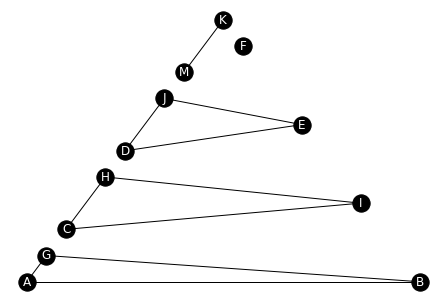

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = ["A", "B", "C", "D", "E", "F", "J", "H", "I", "K", "M"]
edges = [("A", "B"), ("B", "G"),
         ("G", "A"), ("E", "D"),
         ("D", "J"), ("J", "E"),
         ("A", "B"), ("B", "G"),
         ("G", "A"), ("I", "C"),
         ("C", "H"), ("H", "I"),
         ("M", "K")]

graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

nx.draw(graph,
        pos=nx.planar_layout(graph),
        with_labels=True,
        font_color="white",
        node_color="black")

#### 1.2) Створити текстовий файл з зображенням графа, придатний для завантаження засобами бібліотеки NetworkX
Змінна _**path**_ - об'єкт класу Path, що є шляхом до файлу в який ми хочемо покласти наш граф. Граф використовуємо із клітини вище 

In [2]:
from pathlib import Path

path = Path("./g.graph")
nx.write_adjlist(graph, path)

### 2) Побудувати  графічний файл із зображенням графа

#### 2.1) Завантажити граф з файлу побудованого на минулому кроці
Змінну _**path**_ беремо із клітки вище

In [3]:
graph = nx.read_adjlist(path)

#### 2.2) Побудувати графічний файл із зображенням графа
Зображення графа завантажуємо у файл _graph.png_ 

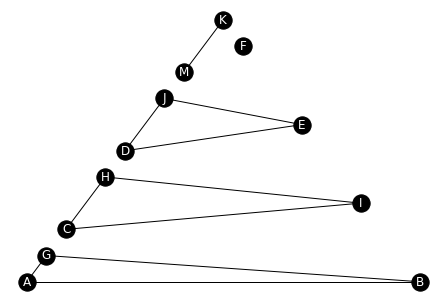

In [4]:
nx.draw(graph,
        pos=nx.planar_layout(graph),
        with_labels=True,
        font_color='white',
        node_color='black')
plt.savefig("graph.png", format="PNG")

### 3) Побудувати графічний файл із зображеннями графа

#### 3.1) Налаштувати зображення графа так, щоб компоненти зв'язності розташувались послідовно
Записуємо позиції графа у спецільну змінну _**layout**_ типу **dict**, який має за ключі вершини а за значення - координати вершин. Змінну _**layout**_ ми будемо використовувати для зображення графа і далі. Нову версію графічного зображення нашого файла завантажуємо у файл _graph_cstm_layout.png_

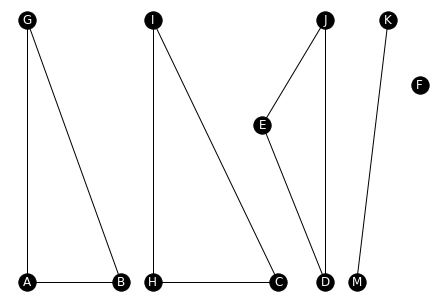

In [5]:
layout = {'A': [-1,   0],
          'B': [-0.4, 0],
          'C': [ 0.6, 0],
          'D': [ 0.9, 0],
          'E': [ 0.5, 0.12],
          'F': [ 1.5, 0.15],
          'G': [-1,   0.2],
          'H': [-0.2, 0],
          'I': [-0.2, 0.2],
          'J': [ 0.9, 0.2],
          'M': [ 1.1, 0],
          'K': [ 1.3, 0.2]}
nx.draw(graph,
        pos=layout,
        with_labels=True,
        font_color='white',
        node_color='black')
plt.savefig("graph_cstm_layout.png", format="PNG")

### 4) Вивести деякі дані по кожній компоненті зв'язності
В задачі потрібно вивести такі данні для кожної компоненти зв'язності: кількість вершин та ребер, степені та ексцентриситети вершин, радіус, діаметр.

In [6]:
components = []
for nodes in nx.connected_components(graph):
    components.append(graph.subgraph(nodes))
    
text =  "number of nodes:{0}\n" \
        "number of edges:{1}\n" \
        "degrees:\t{2}\n" \
        "eccentricities:\t{3}\n" \
        "radius: \t{4}\n" \
        "diameter:\t{5}\n" \
        "=================================="

for component in components:
    print(text.format(component.number_of_nodes(), 
                      component.number_of_edges(), 
                      component.degree,
                      nx.eccentricity(component),
                      nx.radius(component),
                      nx.diameter(component)))

number of nodes:3
number of edges:3
degrees:	[('B', 2), ('A', 2), ('G', 2)]
eccentricities:	{'B': 1, 'A': 1, 'G': 1}
radius: 	1
diameter:	1
number of nodes:3
number of edges:3
degrees:	[('I', 2), ('H', 2), ('C', 2)]
eccentricities:	{'I': 1, 'H': 1, 'C': 1}
radius: 	1
diameter:	1
number of nodes:3
number of edges:3
degrees:	[('E', 2), ('J', 2), ('D', 2)]
eccentricities:	{'E': 1, 'J': 1, 'D': 1}
radius: 	1
diameter:	1
number of nodes:1
number of edges:0
degrees:	[('F', 0)]
eccentricities:	{'F': 0}
radius: 	0
diameter:	0
number of nodes:2
number of edges:1
degrees:	[('K', 1), ('M', 1)]
eccentricities:	{'K': 1, 'M': 1}
radius: 	1
diameter:	1


### 5) Для кожної нетрівіальної компоненти зв'язності програмно знайти хоча б один діаметр і розфарбувати його в інший колір
У змінні _**d_nodes**_ і _**d_edges**_, що мають тип **list**, додаю усі вершини та ребра відповідно, що належать діаметру. Далі усі ребра та вершини, що належать діаметру, перефарбовуємо у синій.

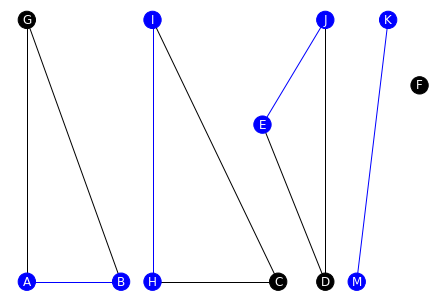

In [7]:
d_nodes = []
d_edges = []

for component in components:
    d_node = ""  # node that has max eccentricity (diameter)
    ecces = nx.eccentricity(component) # eccentricities of the component
    diameter = max(ecces.values())
    
    if diameter == 0:
        continue
        
    for k, v in ecces.items():
        if v == diameter:
            d_node = k
            break

    path = []
    current_path = []
    for node in component.nodes():
        if node == d_node:
            continue
        current_path = nx.shortest_path(component, d_node, node)

        if len(current_path)-1 == diameter:
            path = current_path
            break
    
    d_nodes.extend(path)
    # change list of nodes to list of edges
    path = [(path[i], path[i+1]) for i in range(len(path)-1)]
    d_edges.extend(path)
    
    
# list of colors for each edge and node in main graph
edge_colors = ['b' if edge in d_edges or edge[::-1] in d_edges else 'black'
               for edge in graph.edges()]
node_colors = ['b' if node in d_nodes or node[::-1] in d_nodes else 'black'
               for node in graph.nodes()]

nx.draw(graph,
        pos=layout,
        edge_color=edge_colors,
        with_labels=True,
        font_color="white",
        node_color=node_colors)

### 6) Побудова кістякового лісу
#### 6.1) Програмно побудувати глибиний кістяковий ліс

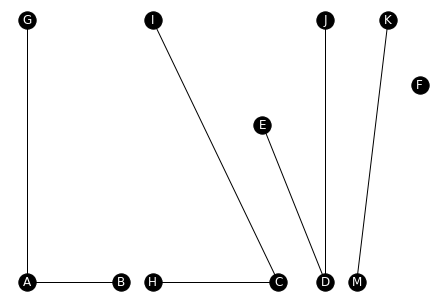

In [8]:
forest = nx.minimum_spanning_tree(graph)
nx.draw(forest,
        pos=layout,
        with_labels=True,
        font_color="white",
        node_color="black")

#### 6.2) Побудувати зображення графа, на якому ребра знаденного лісу виділено кольором
Сам кістяковий ліс візьмемо із клітини вище у змінній _**forest**_.

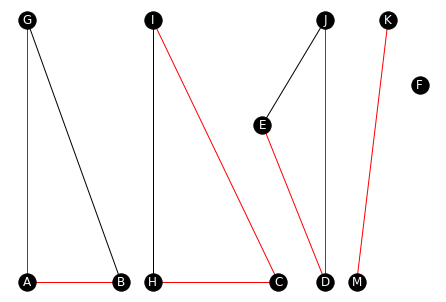

In [9]:
edge_colors = [('r' if edge in forest.edges() else 'black')
                for edge in graph.edges()]

nx.draw(graph,
        pos=layout,
        edge_color=edge_colors,
        with_labels=True,
        font_color="white",
        node_color="black")